Genera data rapidamente para MRU y entremedio con una probabilidad que se comporta con una distribución binomial decide si ingresar ruido o no.
El ruido que ingresa es normal

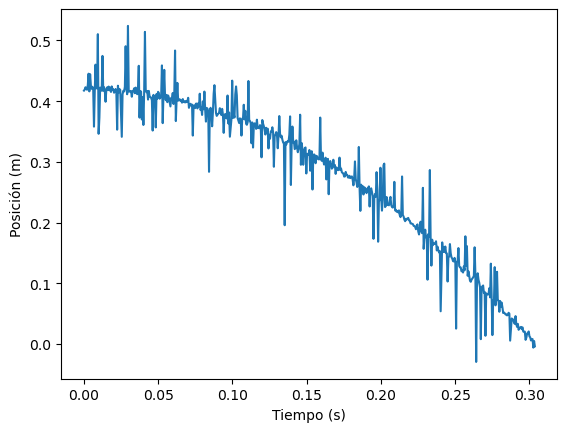

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def caida_libre(t, x0=0.4, v0=0, g=9.81):
    """Calcula la posición de un objeto que cae en caída libre"""
    x = x0 + v0 * t - 0.5 * g * t**2
    return x
    
# Parámetros 
v0 = 0
x0 = 0.42
g = 9.1
dt = 520e-6 # Intervalo de tiempo de Arduino 

# Lista de tiempos 
t = np.arange(0, 0.4, dt)

# Lista de posiciones 
posiciones = caida_libre(t,x0, v0, g)
posiciones = posiciones[posiciones > 0]
t = t[:len(posiciones)]

p0 = 0.25 
mask = np.random.choice([True, False], size=len(posiciones), p=[p0, 1-p0])
posiciones[mask] += np.random.normal(loc=0, scale=0.045, size=sum(mask))


# Agregar ruido aleatorio 
ruido = np.random.normal(0, 0.004, len(posiciones)) 
posiciones = posiciones + ruido 

# Gráfica 
plt.plot(t, posiciones) 
plt.xlabel('Tiempo (s)') 
plt.ylabel('Posición (m)') 
plt.show() 